In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
import os
import statsmodels.api as sm

In [3]:
# Specify the Excel file path
total_consumption_path = 'total.xlsx'

# Read the Excel file into a pandas DataFrame
total_consumption = pd.read_excel(total_consumption_path, engine='openpyxl')
total_consumption = pd.DataFrame(total_consumption)
total_consumption = total_consumption.set_index('time')

print(total_consumption.shape)
print(total_consumption.head())

(54, 7)
              NSW    VIC    QLD     SA     WA    TAS     NT
time                                                       
2019-01-01  100.0  100.0  100.0  100.0  100.0  100.0  100.0
2019-02-01  104.8  105.3  102.8  104.6  103.9  102.0  101.6
2019-03-01  106.1  107.7  104.0  105.3  104.9  102.2  103.3
2019-04-01  106.2  108.1  104.4  106.5  105.6  103.4  109.7
2019-05-01  107.3  110.3  105.5  107.3  107.1  102.2  110.5


<Axes: xlabel='time'>

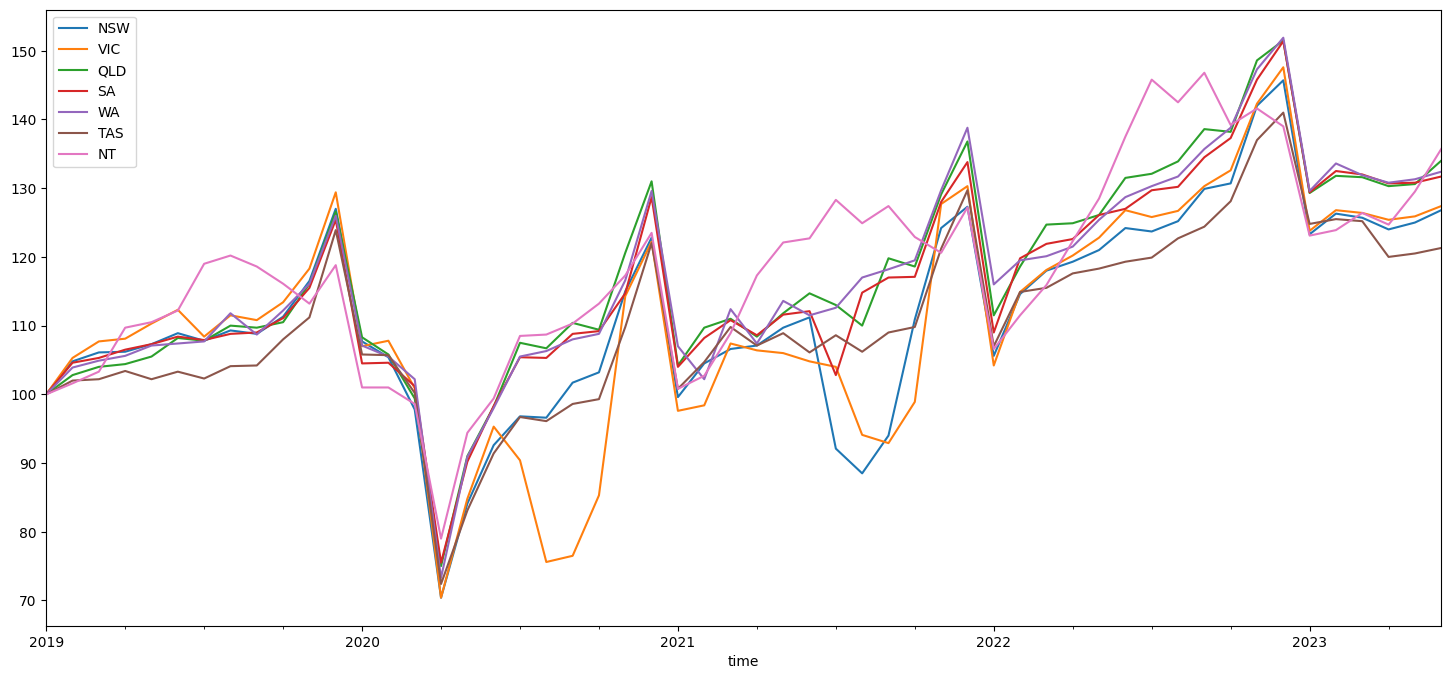

In [4]:
total_consumption.plot()

1. The data is not the actual spending amount but an index. They all start from 100 by the first time it got recorded and increase or decrease based on the index.
2. The graph is useful when looking at the trend for each individual states but cannot be used to compare the actual spending amount between states.

In [5]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

NSW prediction

In [6]:
# Specify the Excel file path
total_consumption_path = 'total.xlsx'

# Read the Excel file into a pandas DataFrame
total_consumption = pd.read_excel(total_consumption_path, engine='openpyxl')
total_consumption = pd.DataFrame(total_consumption)
total_consumption = total_consumption.set_index('time')
total_consumption_NSW = total_consumption['NSW'].iloc[:15]
print(total_consumption_NSW.shape)
print(total_consumption_NSW.head())

(15,)
time
2019-01-01    100.0
2019-02-01    104.8
2019-03-01    106.1
2019-04-01    106.2
2019-05-01    107.3
Name: NSW, dtype: float64


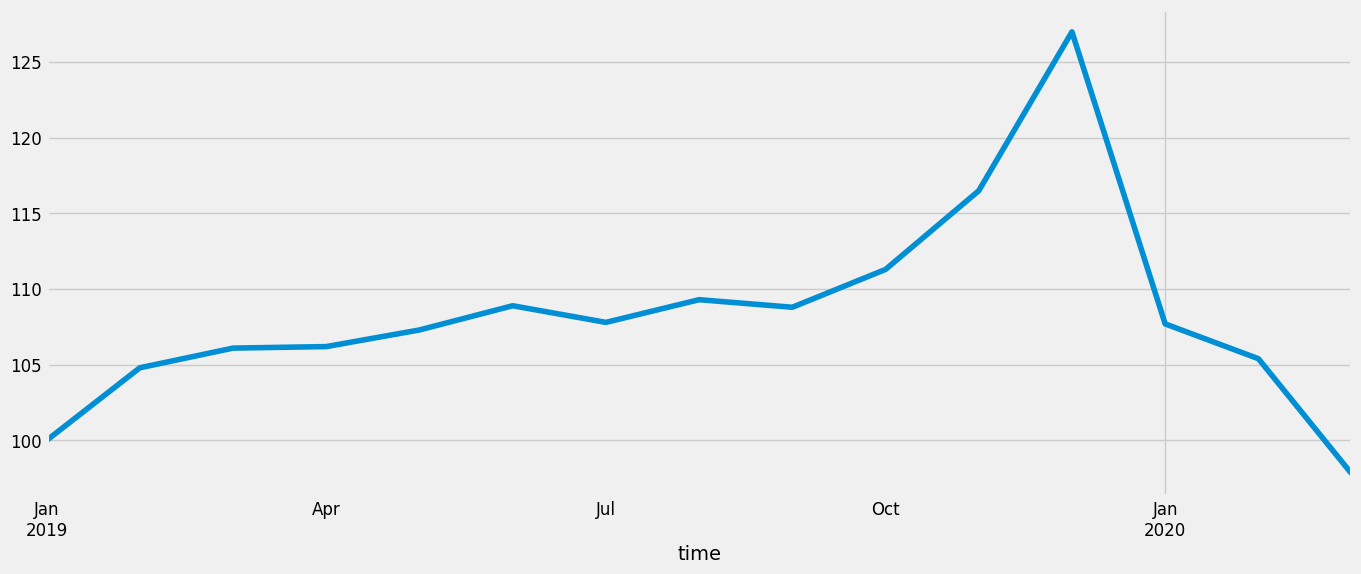

In [7]:
total_consumption_NSW.plot(figsize=(15, 6))
plt.show()

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(total_consumption_NSW, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 15 observation(s)